<a href="https://colab.research.google.com/github/mohitmakvana/mohitmakvana/blob/main/exercise_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
"""
Hello :)

Read the questions carefully and code what it is asked in the respective code block.

There are also testing blocks that are there to check whether your implementations are correct, you
can run them but DO NOT change the code inside of them.
The tests are determined via the assert statements that you see on the testing blocks that can help you
out during the coding of the exercises. If you pass all the visible asserts, you will probably get a good
grade on the exercise.

NOTE: THERE ARE ALSO HIDDEN TESTS THAT YOU CANNOT SEE, SO BE SURE TO PROGRAM YOUR FUNCTION CORRECTLY.
IF YOU CHEAT ON THE ASSERTS WITH YOUR IMPLEMENTATION, YOU WONT PASS THE HIDDEN TESTS ;)
"""

'\nHello :)\n\nRead the questions carefully and code what it is asked in the respective code block.\n\nThere are also testing blocks that are there to check whether your implementations are correct, you\ncan run them but DO NOT change the code inside of them.\nThe tests are determined via the assert statements that you see on the testing blocks that can help you\nout during the coding of the exercises. If you pass all the visible asserts, you will probably get a good\ngrade on the exercise.\n\nNOTE: THERE ARE ALSO HIDDEN TESTS THAT YOU CANNOT SEE, SO BE SURE TO PROGRAM YOUR FUNCTION CORRECTLY.\nIF YOU CHEAT ON THE ASSERTS WITH YOUR IMPLEMENTATION, YOU WONT PASS THE HIDDEN TESTS ;)\n'

---

### BioSig Exercises WS 23/24
---

# Exercise 09

In [ ]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
#matplotlib widget

# If you are using Jupyter Notebook
# %matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 40})
import pandas as pd
import numpy as np


In [ ]:
from scipy import signal

In [ ]:
def pole_zero_plot(b=None, a=None, sos=None, ax=None, print_pz=True):
    from matplotlib import patches
    if sos is not None:
        zeros, poles, _ = signal.sos2zpk(sos)
    else:
        zeros, poles, _ = signal.tf2zpk(b, a)
    if print_pz is True:
        print("zeros:\n", zeros, "\npoles:\n'", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    if not ax:
        plt.figure()
        ax = plt.subplot(1, 1, 1)

    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    ax.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    ax.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)

    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        ax.text(pos.real, pos.imag, c, fontsize=12)

    ax.axis('scaled')
    ax.axis([-1.5, 1.5, -1.5, 1.5])

    ax.set_xlabel('Re')
    ax.set_ylabel('Im')

def plot_freq_response(b=None, a=None, sos=None, sampling_rate=None, log_y=True,create_new_fig=True, label=None, unwrap=True):
    """Plot the freq response of a window.

    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    # Calculate the frequency response using scipy.signal.freqz
    # Use the fs parameter to calculate the output relative to the sampling rate
    if not sampling_rate:
        sampling_rate = 2 * np.pi

    if sos is not None:
        w, h = signal.sosfreqz(sos, fs=sampling_rate)
    else:
        w, h = signal.freqz(b, a, fs=sampling_rate)

    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()

    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')

    ax1.plot(w, h_plot, 'b', label=label)
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.angle(h)
    angles = np.nan_to_num(angles)
    if unwrap:
        angles = np.unwrap(angles)
    ax2.plot(w, angles, 'g', label=label)
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Ex 9.1: SOS-Filtering

In last exercise we learned that filters of high order can get numerically unstable.
A solution is to split a high-order filter into multiple filters of a lower order.
With SOS (second-order-section) filtering, we describe a higher order filter by filters of first or second order.

a) Create a “medium-order” Butterworth filter once using the parameter `output=’ba’`. Plot the pole-zero plot and the magnitude response of the filter.

b) Create the same filter using the parameter `output=’sos’`. Inspect the output. In how many sections was the filter divided?

Based on the documentation:
*Array of second-order filter coefficients, must have a shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.*

c) Plot the pole-zero-plots for each section and compare it to the original pole-zero-plot. Now, plot the magnitude response of each section and compare it.

d) Increase the filter order until the simple filter gets unstable. Create an SOS-filter with the same order and compare the outputs in the z-plane and regarding the magnitude response.

zeros:
 [-1.00674577+0.00330183j -1.00674577-0.00330183j -1.00154726+0.00727405j
 -1.00154726-0.00727405j -0.99535345+0.00568063j -0.99535345-0.00568063j
 -0.99270705+0.j        ] 
poles:
' [0.88986683+0.28188603j 0.88986683-0.28188603j 0.7974187 +0.20257022j
 0.7974187 -0.20257022j 0.74393428+0.1048779j  0.74393428-0.1048779j
 0.72654253+0.j        ]


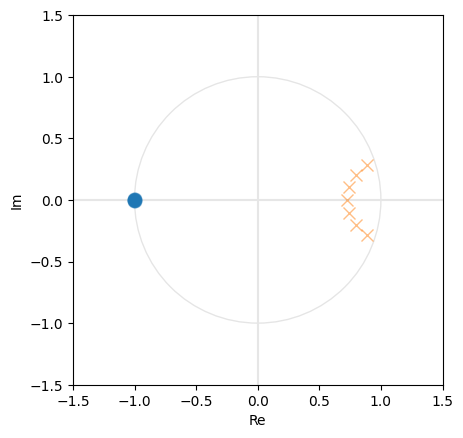

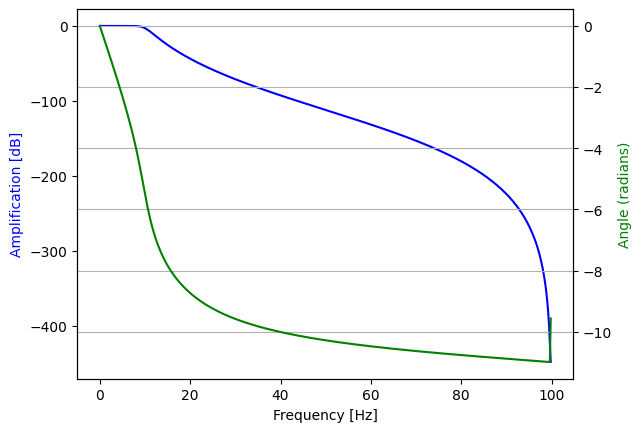

In [ ]:
from scipy import signal

N = 7
Wn = 10  # Hz
sampling_rate = 200  # Hz

# Create a butterworth filter using the `ba` output. Name the filter coefficients as 'b' and 'a'.

# YOUR CODE HERE
b, a = signal.butter(N, Wn, fs=sampling_rate, output='ba')

# Plot the Pole-zero plot and the magnitude response
# YOUR CODE HERE
pole_zero_plot(b, a, sos=None)
plot_freq_response(b=b ,a=a, sos=None,sampling_rate=sampling_rate,log_y=True,create_new_fig=True,label=None,unwrap=True)


In [ ]:

assert abs(sum(b[0:3] - [1.22964989e-06, 8.60754921e-06, 2.58226476e-05])) < 1e-3, 'The first three coefficients are wrong.'
print('The first three coefficients are correct!')

The first three coefficients are correct!


In [ ]:
# Create the same filter using `sos` output. Name to sos filter coefficients as 'sos'
# YOUR CODE HERE
sos = signal.butter(N, Wn, fs=sampling_rate, output='sos')

# Inspect the output
# YOUR CODE HERE
sos

array([[ 1.22964989e-06,  2.45929977e-06,  1.22964989e-06,
         1.00000000e+00, -7.26542528e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.48786856e+00,  5.64437591e-01],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.59483739e+00,  6.76911275e-01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -1.77973365e+00,  8.71322704e-01]])

In [ ]:

assert abs(sum(sos[0][0:3] - [1.22964989e-06, 2.45929977e-06, 1.22964989e-06])) < 1e-3, 'Three coefficients of the sos filter are wrong.'
print('Three coefficients of the sos filter are correct!')


Three coefficients of the sos filter are correct!


zeros:
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  0.+0.j] 
poles:
' [0.72654253+0.j         0.        +0.j         0.74393428+0.1048779j
 0.74393428-0.1048779j  0.7974187 +0.20257022j 0.7974187 -0.20257022j
 0.88986683+0.28188603j 0.88986683-0.28188603j]


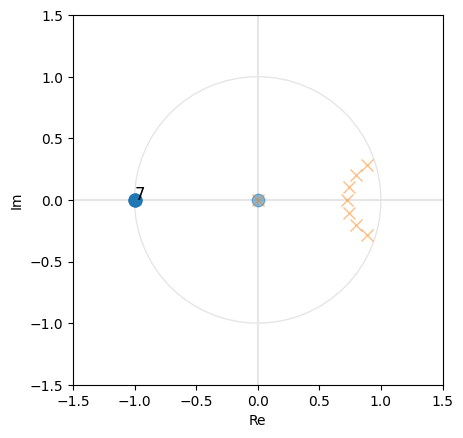

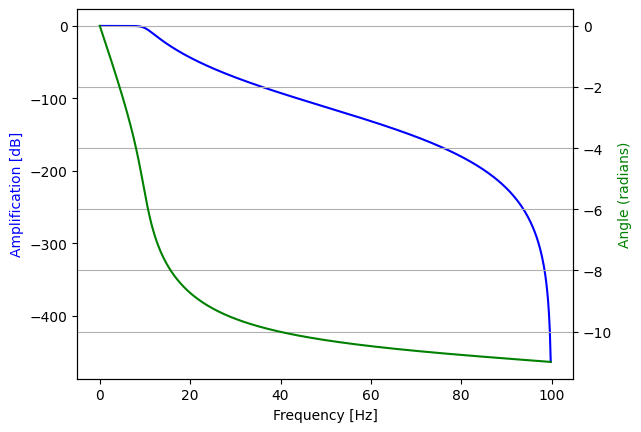

In [ ]:
# Plot the pole zero plot for each section
# YOUR CODE HERE
pole_zero_plot(b, a, sos)

# Plot the magnitude response of each sos section
# YOUR CODE HERE
plot_freq_response(b ,a, sos,sampling_rate)

In [ ]:
# Find a filter order N, where the traditional filter becomes unstable.
# Than repeat the analysis above using this N
# TODO: YOUR CODE HERE
def are_poles_stable(poles):
    """Check if poles are inside the unit circle."""
    return all(np.abs(pole) <= 1 for pole in poles)

N = 1  # Starting order
stability_found = False

while not stability_found:
    # Create a Butterworth filter using the current N
    b, a = signal.butter(N, Wn, fs=sampling_rate)

    # Calculate the poles of the filter
    poles = np.roots(a)

    # Check if any pole is outside the unit circle (unstable)
    if not are_poles_stable(poles):
        stability_found = True
        print(f"Filter becomes unstable at order N = {N}.")
        print("Unstable poles:", poles)
    else:
        N += 1  # Increment order for the next iteration


Filter becomes unstable at order N = 20.
Unstable poles: [1.00720227+0.j         0.99619303+0.1522644j  0.99619303-0.1522644j
 0.96913682+0.27389952j 0.96913682-0.27389952j 0.92649946+0.32775596j
 0.92649946-0.32775596j 0.85404229+0.33029007j 0.85404229-0.33029007j
 0.78159634+0.30422205j 0.78159634-0.30422205j 0.72065282+0.25875115j
 0.72065282-0.25875115j 0.67366579+0.20129668j 0.67366579-0.20129668j
 0.64119972+0.13655907j 0.64119972-0.13655907j 0.62290778+0.06857717j
 0.62290778-0.06857717j 0.6171614 +0.j        ]


In [ ]:
# Block for the hidden tests. This block can be skipped.

In [ ]:
# Recreate the unstable filter as SOS
# Note that both, `pole_zero_plot` and the `plot_freq_response` have parameters to deal with sos intput.
# TODO: YOUR CODE HERE

N = 1  # Starting order
stability_found = False

while not stability_found:
    # Create a Butterworth filter using the current N
    b, a = signal.butter(N, Wn, fs=sampling_rate)

    # Calculate the poles of the filter
    poles = np.roots(a)

    # Check if any pole is outside the unit circle (unstable)
    if not are_poles_stable(poles):
        stability_found = True
        print(f"Filter becomes unstable at order N = {N}.")

        # Convert the unstable filter to SOS format
        sos_unstable = signal.butter(N, Wn, fs=sampling_rate, output='sos')

        # Print the SOS coefficients for the unstable filter
        print("\nSOS Coefficients for the unstable filter:")
        print(sos_unstable)

        # Determine the number of sections
        n_sections_unstable = sos_unstable.shape[0]
        print(f"\nThe unstable filter was divided into {n_sections_unstable} sections.")
    else:
        N += 1  # Increment order for the next iteration

Filter becomes unstable at order N = 20.

SOS Coefficients for the unstable filter:
[[ 1.31821644e-17  2.63643288e-17  1.31821644e-17  1.00000000e+00
  -1.45414326e+00  5.28976710e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.46262514e+00  5.37895084e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.47967422e+00  5.55821543e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.50545523e+00  5.82929309e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.54019948e+00  6.19461567e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.58418265e+00  6.65708213e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.63769006e+00  7.21969235e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.70096433e+00  7.88499740e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.77412982e+00  8.65430485e-01]
 [ 1.00

## Ex 9.2: Pan-Tompkins 1

The Pan-Tompkins algorithm is the most famous algorithm for detecting QRS complexes in ECG signals.
In the following we will implement the filter part of the Pan-Tompkins and apply it some ECG data that was recorded during the measurement exercise last year.

Use the lecture as reference for all parts of the filter cascade.

a) Implement the low-pass and high-pass component of the band-pass filter and apply it to the test data

b) Implement the differentiator and apply it to the test data

c) Square your test data

d) Implement the moving window integrator and apply it to the test signal


At every step you can use a pole-zero-plot to verify your implementation.

Saving example_ecg.csv to example_ecg.csv


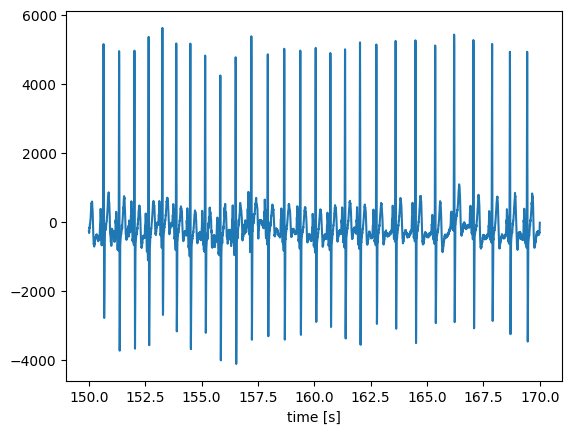

In [ ]:
# Load one of the data files and extract the exg column
from google.colab import files
files.upload()
path = '/content/Data/example_ecg.csv'
orig_sampling_rate = 256.  # Hz
pan_sampling_rate = 200.  # Hz

ecg = pd.read_csv(path, header=1, skiprows=0, index_col='timestamp')['ecg']

# resample the data to 200 Hz for the algorithms
ecg_resampled = pd.Series(signal.resample(ecg, int(len(ecg) * pan_sampling_rate/orig_sampling_rate)))

ecg_resampled.index /= pan_sampling_rate

# For visualisation and testing select part of the signal
ecg_part = ecg_resampled.loc[150:170]

plt.figure()
ecg_part.plot()
plt.xlabel('time [s]');

### Bandpass Filter Part 1: Low-pass

### Hint:

From the lecture we know that the used low-pass filter has the following transfer function:

$y(n) = 2\cdot y(n-1) - y(n-2) + \frac{1}{32} \cdot (x(n) - 2\cdot x(n-6) + x(n-12))$

this leads to a transfer function of:

$H(z) = ...$

and finally to the following coefficients:

```
a_lowpass = [...]
b_lowpass = [...]
```

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


zeros:
 [] 
poles:
' [1. 1.]


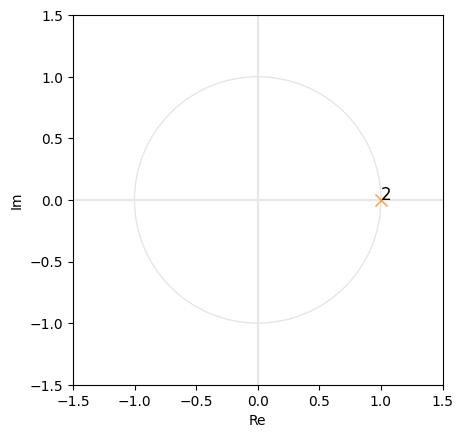

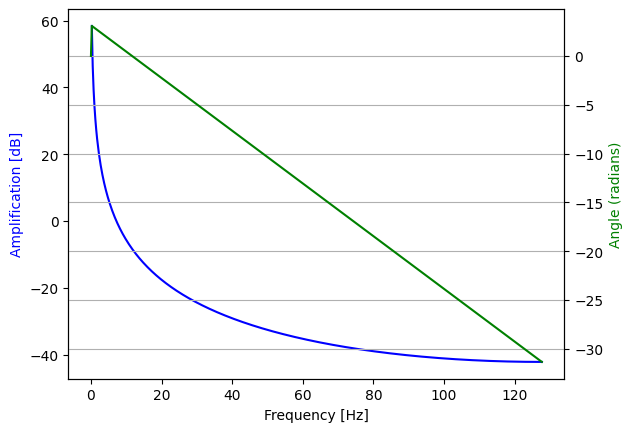

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot
# Store the filter coefficients in 'b_lowpass' and 'a_lowpass'
# YOUR CODE HERE
from scipy.signal import lfilter, freqz, resample

b_lowpass = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/32]
a_lowpass = [1, -2, 1]


# Plot pole-zero plot
pole_zero_plot(b_lowpass,a_lowpass)

# Plot magnitude response
plot_freq_response(b=b_lowpass ,a=a_lowpass, sos=None,sampling_rate=orig_sampling_rate,log_y=True,create_new_fig=True,label=None,unwrap=True)


In [ ]:

assert b_lowpass[12] == 1. / 32, 'The last coefficient of b of the lowpass filter is wrong.'
assert a_lowpass[2] == 1.0, 'The last coefficient of a of the lowpass filter is wrong.'
print('The last coefficients of a and b of the lowpass filter are correct')

The last coefficients of a and b of the lowpass filter are correct


In [ ]:
# Filter the ECG sample with the lowpass filter
# Store the filtered signal in variable 'data_lp'
# YOUR CODE HERE

data_lp = lfilter(b_lowpass, a_lowpass, ecg_part)

In [ ]:
assert np.abs(np.sum(data_lp) + 260430.375538306) >1e-3, 'Samples from the lowpass filtered signal are wrong'
print('Samples from the lowpass filtered signal are correct')

Samples from the lowpass filtered signal are correct


### Bandpass Filter Part 2: High-pass

### Hint:

From the lecture we know that the high-pass can be described by combining an all-pass with a low-pass filer.
The following function describes the low-pass component:

$y_{lp}(n) = y_{lp}(n-1) + x(n) - x(n-32)$

From this we can calculate the transfer function:

$H_{lp}(z) = ...$

When we substitute this into the overall transfer function, we got from the lecture, we get:

$H_{hp}(z) = ...$

And finally, the parameters:

```
a_highpass = [...]
b_highpass = [...]
```

zeros:
 [] 
poles:
' [1. 1.]


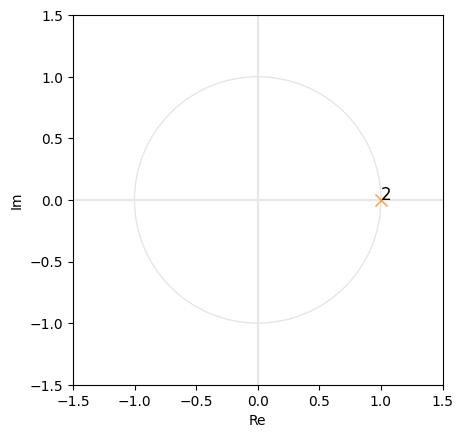

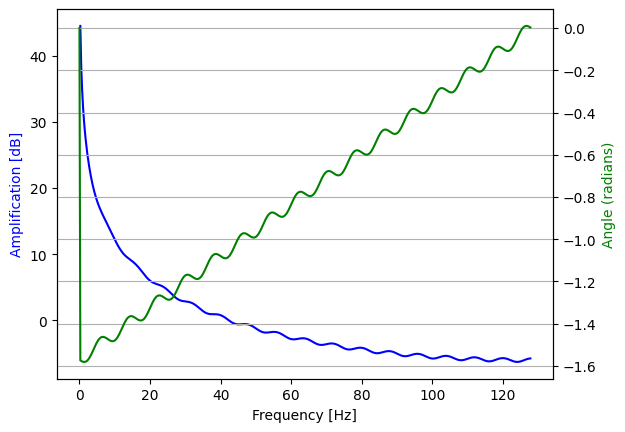

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot
# Store the filter coefficients in 'b_highpass' and 'a_highpass'
from scipy.signal import lfilter
# YOUR CODE HERE
b_highpass = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1 / 32]
a_highpass = [1,-1]

# Plot pole-zero plot
pole_zero_plot(b_lowpass,a_lowpass)

# Plot magnitude response
plot_freq_response(b=b_highpass ,a=a_highpass, sos=None,sampling_rate=orig_sampling_rate,log_y=True,create_new_fig=True,label=None,unwrap=True)


In [ ]:

assert b_highpass[32] == 1 / 32, 'The last coefficient of b of the highpass filter is wrong.'
assert a_highpass[1] == -1, 'The last coefficient of a of the highpass filter is wrong.'
print('The last coefficients of a and b of the highpass filter are correct')

The last coefficients of a and b of the highpass filter are correct


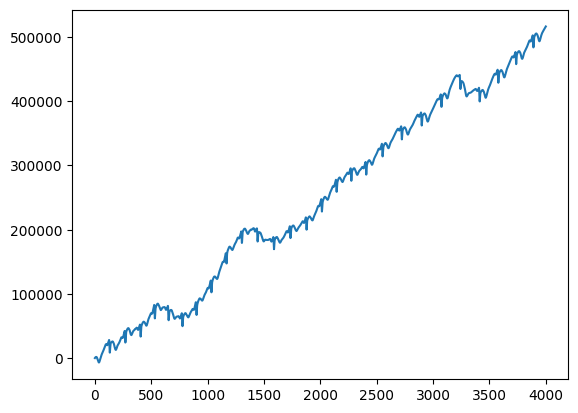

In [ ]:
# Apply the filter to the already lowpassed filter data and plot the result
# Store the filtered signal in variable 'data_hp'
# YOUR CODE HERE

lowpass = lfilter(b_highpass, a_highpass, ecg_part)

data_hp = 1 - lowpass

plt.figure()
plt.plot(data_hp)
plt.show()


In [ ]:

assert abs(sum(data_hp[0:2000]) + 1457.7448013744804) > 1e-3, 'Samples from the first half of the highpass filtered signal is wrong'
print('Samples from the first half of the highpass filtered signal is correct')



Samples from the first half of the highpass filtered signal is correct


### Derivative Operator

### Solution:

From the lecture we know that the derivative operator can be described by the following equation:

$y(n) = \frac{1}{8}\left[2x(n)+x(n-1)-x(n-3)-2x(n-4)\right]$

From this we can calculate the transfer function:

$H(z) = ...$

And finally, the parameters:

```
a_diff = [...]
b_diff = [...]
```

zeros:
 [-2. +0.j         1. +0.j        -0.5+0.8660254j -0.5-0.8660254j] 
poles:
' [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j         0. +0.j       ]


/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


<Figure size 1200x600 with 0 Axes>

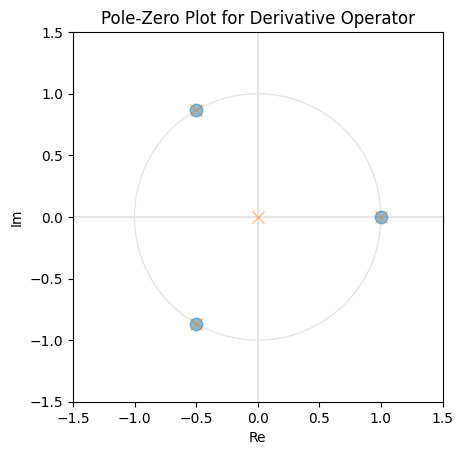

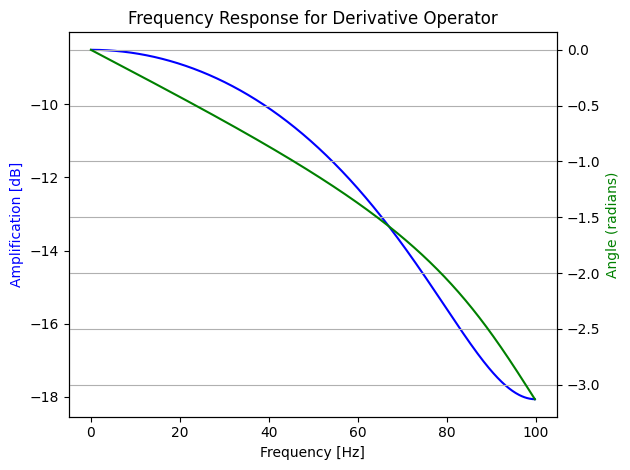

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot
# Store the filter coefficients in 'b_diff' and 'a_diff'

# YOUR CODE HERE
b_diff = [1/8,1/4,0,-1/8,-1/4]
a_diff = [1,0,0,-1,0]

plt.figure(figsize=(12, 6))

pole_zero_plot(b_diff, a_diff)
plt.title('Pole-Zero Plot for Derivative Operator')

plot_freq_response(b_diff, a_diff, sampling_rate=pan_sampling_rate)
plt.title('Frequency Response for Derivative Operator')

plt.tight_layout()
plt.show()

In [ ]:

assert a_diff[4] == 0, 'The last coefficient of a of the derivative operator is wrong.'
assert b_diff[4] == -1./4, 'The last coefficient of b of the derivative operator is wrong.'
print('The last coefficients of a and b of the derivative operator is correct.')

The last coefficients of a and b of the derivative operator is correct.


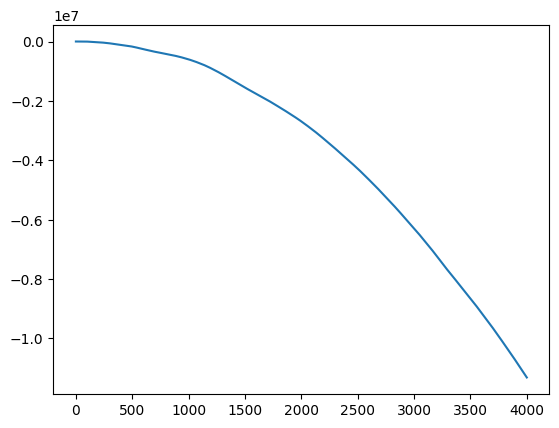

In [ ]:
# Apply the filter to the already bandpassed filter data and plot the result
# Store the filtered signal in variable 'data_diff'

# YOUR CODE HERE
data_diff = lfilter(b_diff, a_diff, data_lp)
plt.figure()
plt.plot(data_diff)

In [ ]:

assert abs(sum(data_diff[0:2000]) + 189.16038490248738) > 1e-3, 'Samples from the first half of the signal after the derivative operator is wrong'
print('Samples from the first half of the signal after the derivative operator is correct')


Samples from the first half of the signal after the derivative operator is correct


### Squaring

In [ ]:
# Square the signal and plot the result
# Store the squared signal in variable 'data_sq'
# YOUR CODE HERE
data_sq = (data_lp**2)

In [ ]:

assert abs(sum(data_sq) - 240206591.26385316) > 1e-3, 'Samples from the first half of the squared signal is wrong'
print('Samples from the first half of the squared signal is correct')

Samples from the first half of the squared signal is correct


### Moving Window Integrator

### Hint:

From the lecture we know the transfer function:

$y(n) = \frac{1}{30}\left[x(n-29) + x(n-28) + ... +x(n)\right]$

From this we can calculate the transfer function:

$H(z) = ...$

And finally, we can read of the parameters:

```
a = [...]
b = [...]
```

zeros:
 [ 0.9781476 +0.20791169j  0.9781476 -0.20791169j  0.91354546+0.40673664j
  0.91354546-0.40673664j  0.80901699+0.58778525j  0.80901699-0.58778525j
  0.66913061+0.74314483j  0.66913061-0.74314483j  0.5       +0.8660254j
  0.5       -0.8660254j   0.30901699+0.95105652j  0.30901699-0.95105652j
  0.10452846+0.9945219j   0.10452846-0.9945219j  -1.        +0.j
 -0.9781476 +0.20791169j -0.9781476 -0.20791169j -0.91354546+0.40673664j
 -0.91354546-0.40673664j -0.80901699+0.58778525j -0.80901699-0.58778525j
 -0.66913061+0.74314483j -0.66913061-0.74314483j -0.10452846+0.9945219j
 -0.10452846-0.9945219j  -0.5       +0.8660254j  -0.5       -0.8660254j
 -0.30901699+0.95105652j -0.30901699-0.95105652j] 
poles:
' [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


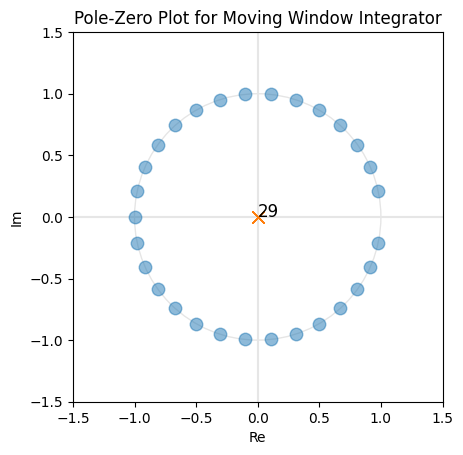

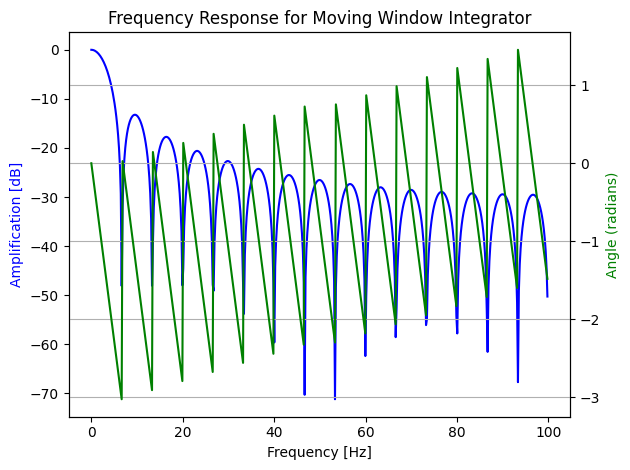

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot
# Store the filter coefficients in 'b_int' and 'a_int'
# YOUR CODE HERE
b_int = np.ones(30) / 30
a_int = [1] + [0] * 29
pole_zero_plot(b_int, a_int)
plt.title('Pole-Zero Plot for Moving Window Integrator')

# Frequency Response Plot
plot_freq_response(b_int, a_int, sampling_rate=pan_sampling_rate)
plt.title('Frequency Response for Moving Window Integrator')

plt.tight_layout()
plt.show()

In [ ]:
assert a_int[29] == 0, 'The last coefficient of a of the moving window integrator is wrong.'
assert b_int[29] == 1/30, 'The last coefficient of b of the moving window integrator is wrong.'
print('The last coefficients of a and b of the moving window integrator are correct.')


The last coefficients of a and b of the moving window integrator are correct.


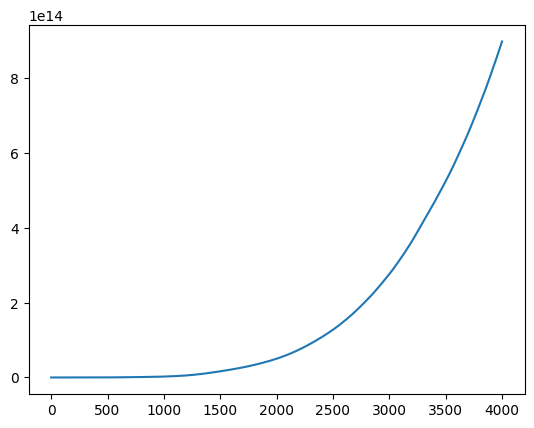

In [ ]:
# Apply the filter to the sqaured data and plot the result
# Store the filtered signal in variable 'data_final'

# YOUR CODE HERE
data_final = lfilter(b_int, a_int, data_lp**2)
plt.figure()
plt.plot(data_final)

In [ ]:
assert np.abs(np.sum(data_final[0:2000]) - 125808438.65881383) > 1e-3, 'Samples from the first half of the signal after the moving window integrator are wrong'
print('Samples from the first half of the signal after the moving window integrator are correct')

Samples from the first half of the signal after the moving window integrator are correct
